In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the dataset (assuming it's already loaded as features_df)
features_df = pd.read_csv("40415474_features.csv")

# Define the predictor variables (all features except aspect_ratio)
predictors = features_df.columns.difference(['aspect_ratio', 'label', 'index'])

# Add a constant for the intercept
X = sm.add_constant(features_df[predictors])
y = features_df['aspect_ratio']

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

# Perform backward elimination to create a parsimonious model
# Drop features with p-values > 0.05 iteratively
significant_features = predictors[model.pvalues[1:] < 0.05]  # Exclude the intercept
X_significant = sm.add_constant(features_df[significant_features])
parsimonious_model = sm.OLS(y, X_significant).fit()

# Display the parsimonious model results
print("\nParsimonious Model Results:")
print(parsimonious_model.summary())


                            OLS Regression Results                            
Dep. Variable:           aspect_ratio   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     247.8
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           1.02e-84
Time:                        01:03:17   Log-Likelihood:                 148.40
No. Observations:                 140   AIC:                            -264.8
Df Residuals:                     124   BIC:                            -217.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1610      0.397     

Intercept: [1.27211469]
Coefficient for cols_with_1: [[-0.32038006]]


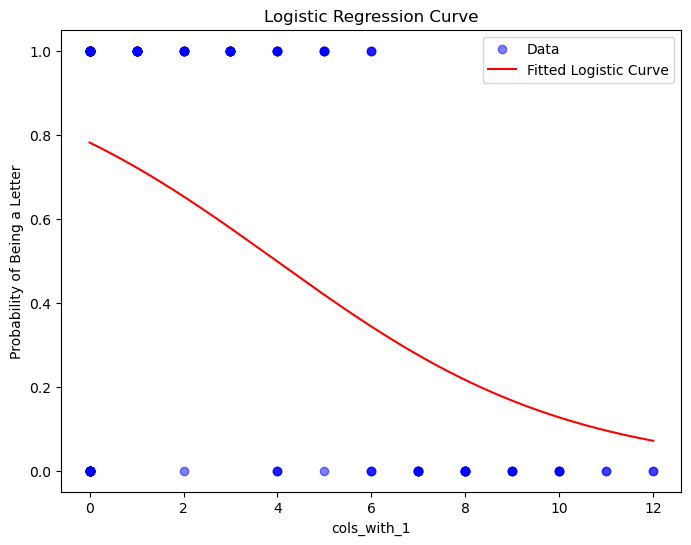

Accuracy: 0.7357142857142858


In [3]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Define the predictor and target variables
X = features_df[['cols_with_1']]  # Use double brackets to keep it as a DataFrame
y = features_df['label'].apply(lambda x: 1 if x in ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'] else 0)

# Fit the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X, y)

# Display the model coefficients
print("Intercept:", logistic_model.intercept_)
print("Coefficient for cols_with_1:", logistic_model.coef_)

# Generate x values for the fitted curve
x_vals = np.linspace(X.min(), X.max(), 1000)

# Convert x_vals to a DataFrame with the same feature name as the training data
x_vals_df = pd.DataFrame(x_vals, columns=['cols_with_1'])

# Predict probabilities for the x values
y_probs = logistic_model.predict_proba(x_vals_df)[:, 1]

# Plot the fitted logistic regression curve
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Data')
plt.plot(x_vals, y_probs, color='red', label='Fitted Logistic Curve')
plt.xlabel('cols_with_1')
plt.ylabel('Probability of Being a Letter')
plt.title('Logistic Regression Curve')
plt.legend()
plt.show()

# Calculate accuracy
y_pred = logistic_model.predict(X)
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

In [5]:
# Create binary features based on median splits
features_df['split1'] = np.where(features_df['nr_pix'] > features_df['nr_pix'].median(), 1, 0)
features_df['split2'] = np.where(features_df['aspect_ratio'] > features_df['aspect_ratio'].median(), 1, 0)
features_df['split3'] = np.where(features_df['neigh_1'] > features_df['neigh_1'].median(), 1, 0)

# Group by class and compute the mean (proportion of "1"s) for each split feature
proportions = features_df.groupby('label')[['split1', 'split2', 'split3']].mean()

# Filter for the three classes: letters, faces, and exclamation marks
classes = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'smile', 'sad', 'xclaim']
proportions = proportions.loc[classes]

# Rename rows for clarity
proportions.index = ['Letters'] * 10 + ['Faces'] * 2 + ['Exclamation Mark']

# Aggregate proportions for each class
proportions = proportions.groupby(proportions.index).mean()

# Display the table
print(proportions)

                  split1  split2  split3
Exclamation Mark   0.350   0.000   0.050
Faces              0.175   0.925   0.125
Letters            0.700   0.375   0.225
